<a href="https://colab.research.google.com/github/97kiwi101/Bet-commands/blob/main/IBM_AI_Close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#pip install
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install pandas-datareader
!pip install tensorflow
!pip install scikit-learn

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM



In [ ]:
#load data
company = 'ibm'

start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 11)

#data = web.DataReader(company, 'yahoo', start, end)
data = web.data.get_data_yahoo(company, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#prepare data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#build the model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
62/62 [==============================] - 13s 96ms/step - loss: 0.0268
Epoch 2/25
62/62 [==============================] - 5s 88ms/step - loss: 0.0057
Epoch 3/25
62/62 [==============================] - 6s 103ms/step - loss: 0.0052
Epoch 4/25
62/62 [==============================] - 5s 84ms/step - loss: 0.0052
Epoch 5/25
62/62 [==============================] - 6s 102ms/step - loss: 0.0046
Epoch 6/25
62/62 [==============================] - 5s 87ms/step - loss: 0.0042
Epoch 7/25
62/62 [==============================] - 7s 115ms/step - loss: 0.0040
Epoch 8/25
62/62 [==============================] - 5s 86ms/step - loss: 0.0040
Epoch 9/25
62/62 [==============================] - 7s 109ms/step - loss: 0.0040
Epoch 10/25
62/62 [==============================] - 6s 89ms/step - loss: 0.0038
Epoch 11/25
62/62 [==============================] - 6s 103ms/step - loss: 0.0041
Epoch 12/25
62/62 [==============================] - 5s 85ms/step - loss: 0.0040
Epoch 13/25
62/62 [============

[*********************100%%**********************]  1 of 1 completed

 3/34 [=>............................] - ETA: 1s

1/1 [==============================] - 0s 35ms/step
Prediction for next day: [[186.41139]]


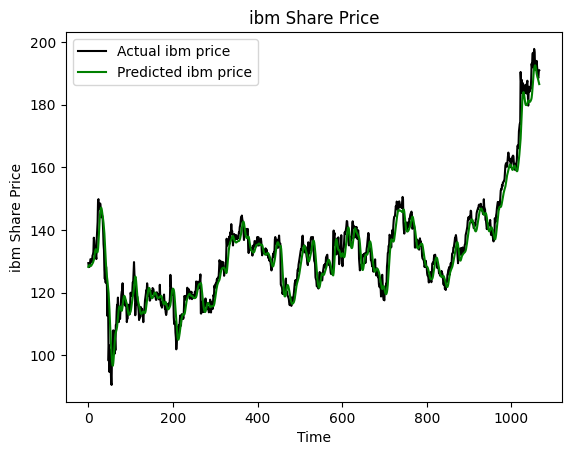

In [ ]:
#test the model

test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = web.data.get_data_yahoo(company, test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i - prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color='black', label=f'Actual {company} price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()

# Predict next day's price
last_day_data = np.array([model_inputs[-prediction_days:]])
last_day_data = np.reshape(last_day_data, (last_day_data.shape[0], last_day_data.shape[1], 1))

next_day_prediction = model.predict(last_day_data)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print(f"Prediction for next day: {next_day_prediction}")

In [ ]:
today = dt.date.today()
next_day = today + dt.timedelta(days=1)

print(f"Next day's date: {next_day}")

Next day's date: 2024-03-29


In [ ]:
model.save('my_model.keras')